In [ ]:
print("Hello World.")

Hello World.


In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#!pip install openml
from sklearn.datasets import fetch_openml#40996

data = fetch_openml(data_id=40996, as_frame=False, cache=True)
print(type(data))
print(data.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [60]:
# Extract features and target
X = data.data
y = data.target

# Convert to numpy arrays if they aren't already
X = np.array(X.astype(np.float32))
y = np.array(y.astype(np.float32))

# Combine features and target for shuffling
combined_data = np.column_stack((y, X))

# Shuffle the data
np.random.shuffle(combined_data)

# Split into dev and training sets
dev_size = 1000
data_dev = combined_data[:dev_size].T
Y_dev = data_dev[0]
X_dev = data_dev[1:]

Y_dev = Y_dev.astype(np.int32)
Y_train = Y_train.astype(np.int32)

data_train = combined_data[dev_size:].T
Y_train = data_train[0]
X_train = data_train[1:]

# Normalize the data
X_dev = X_dev / 255.
X_train = X_train / 255.

# Get the shapes
m_dev, n_dev = X_dev.shape
m_train, n_train = X_train.shape

print(f"Development set shape: {X_dev.shape}")
print(f"Training set shape: {X_train.shape}")

Development set shape: (784, 1000)
Training set shape: (784, 69000)


In [61]:
Y_train

array([5., 5., 6., ..., 1., 1., 8.], dtype=float32)

In [65]:
def init_params():
    W1 = np.random.rand(10, 784).astype(np.float32) - 0.5
    b1 = np.random.rand(10, 1).astype(np.float32) - 0.5
    W2 = np.random.rand(10, 10).astype(np.float32) - 0.5
    b2 = np.random.rand(10, 1).astype(np.float32) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0).astype(np.float32)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return (Z > 0).astype(np.float32)
def one_hot(Y):
    Y = Y.astype(np.int32)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1), dtype=np.float32)
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [66]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration:", i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [68]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
Accuracy: 0.10485507246376811
Iteration: 10
Accuracy: 0.1507391304347826
Iteration: 20
Accuracy: 0.2766521739130435
Iteration: 30
Accuracy: 0.3337971014492754
Iteration: 40
Accuracy: 0.4345072463768116
Iteration: 50
Accuracy: 0.4979710144927536
Iteration: 60
Accuracy: 0.5378260869565218
Iteration: 70
Accuracy: 0.562536231884058
Iteration: 80
Accuracy: 0.579304347826087
Iteration: 90
Accuracy: 0.5918840579710145
Iteration: 100
Accuracy: 0.6029565217391304
Iteration: 110
Accuracy: 0.6121159420289856
Iteration: 120
Accuracy: 0.6192898550724638
Iteration: 130
Accuracy: 0.6263188405797101
Iteration: 140
Accuracy: 0.6340434782608696
Iteration: 150
Accuracy: 0.6404347826086957
Iteration: 160
Accuracy: 0.6476086956521739
Iteration: 170
Accuracy: 0.6446376811594203
Iteration: 180
Accuracy: 0.6380144927536232
Iteration: 190
Accuracy: 0.6418260869565218
Iteration: 200
Accuracy: 0.6453623188405797
Iteration: 210
Accuracy: 0.6487391304347826
Iteration: 220
Accuracy: 0.6514927536231884


In [69]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5.0


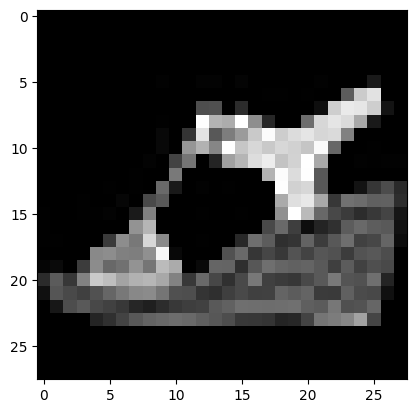

Prediction:  [5]
Label:  5.0


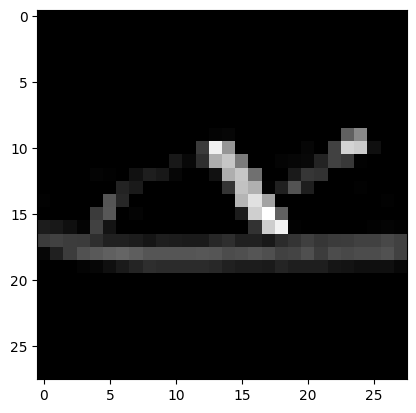

Prediction:  [3]
Label:  6.0


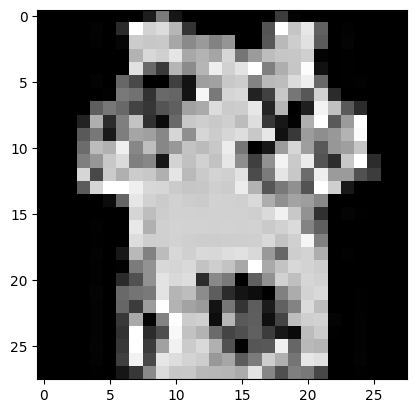

Prediction:  [9]
Label:  9.0


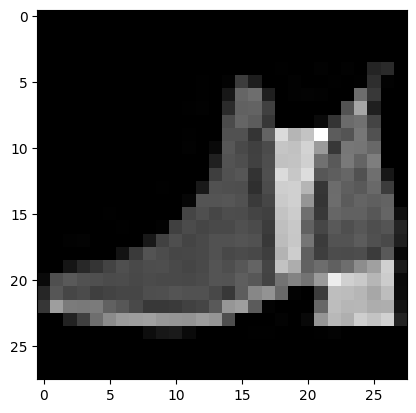

In [70]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [71]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.734